In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [49]:
df = pd.read_csv('Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

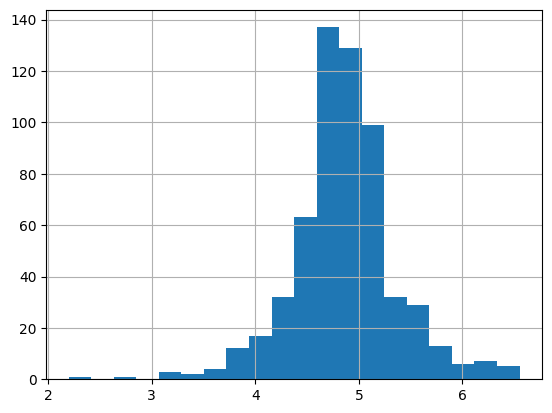

In [52]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

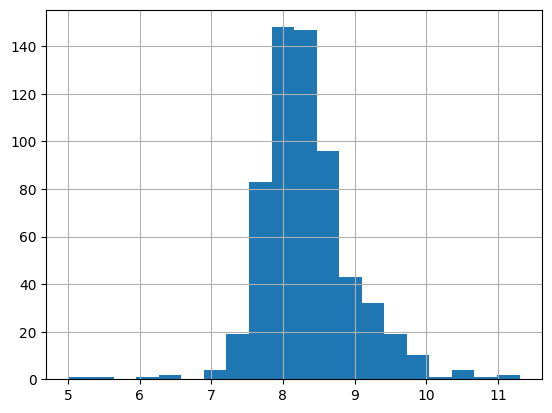

In [53]:
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
df['ApplicantIncome_log'].hist(bins=20)

In [54]:
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
LoanAmount_log         22
ApplicantIncome_log     0
dtype: int64

<Axes: >

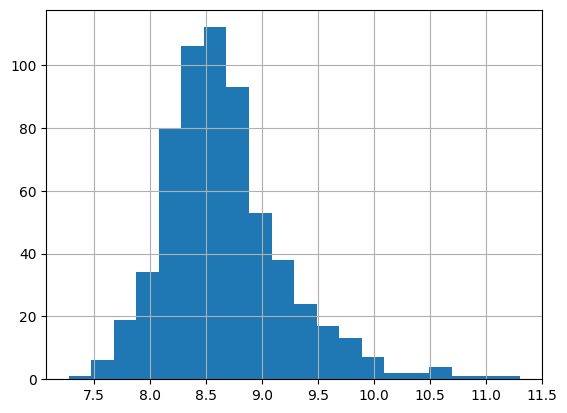

In [55]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

<Axes: >

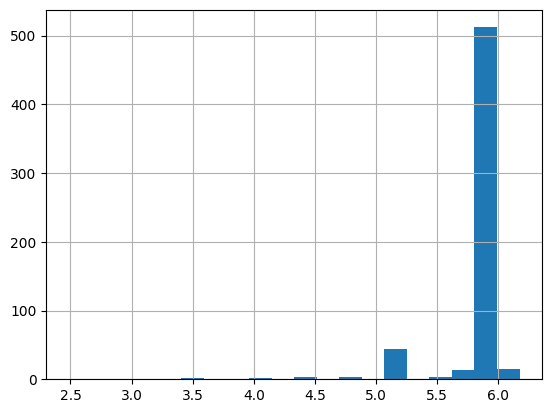

In [56]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])
df['Loan_Amount_Term_log'].hist(bins=20)

Data cleaning visualization and filling null values

In [57]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_18208\1346284350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18208\1346284350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
LoanAmount_log           0
ApplicantIncome_log      0
TotalIncome              0
TotalIncome_log          0
Loan_Amount_Term_log    14
dtype: int64

<Axes: xlabel='ApplicantIncome'>

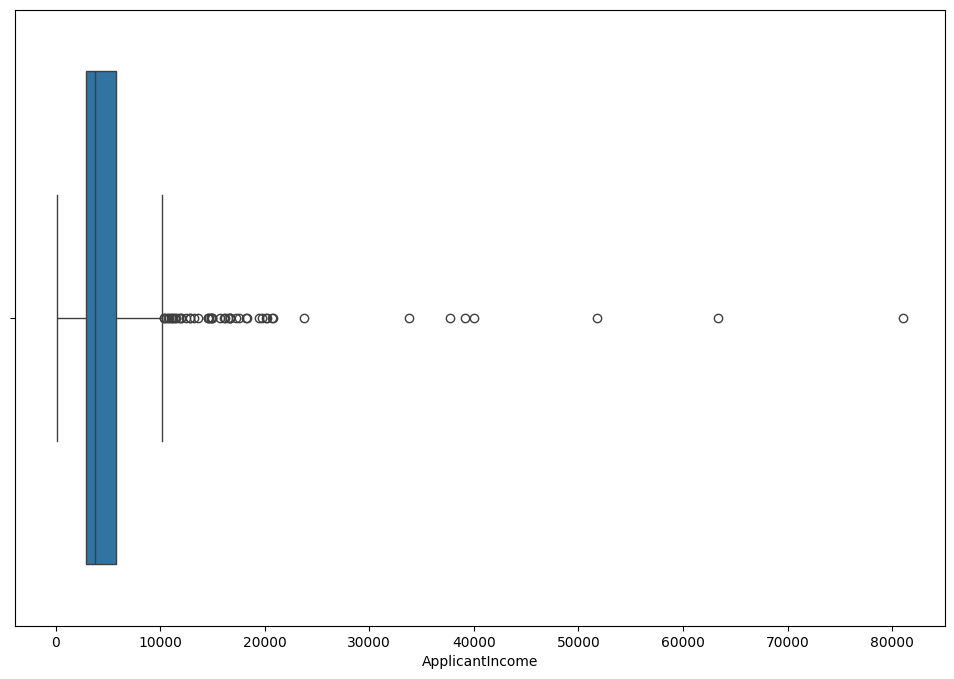

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='ApplicantIncome')


In [59]:
#find the number of people who took loan based on gender
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18208\3824440401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


<Axes: xlabel='Gender', ylabel='count'>

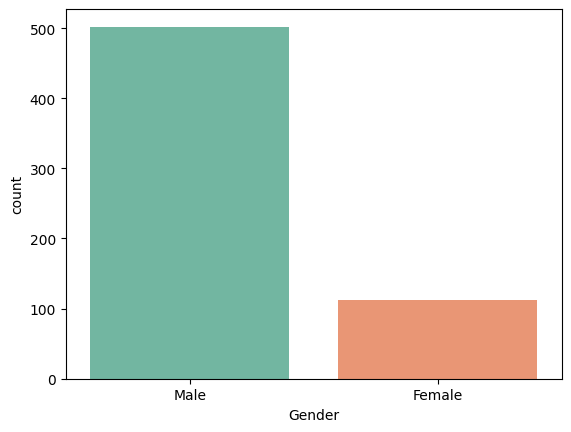

In [60]:
sns.countplot(x='Gender', data=df, palette='Set2')

In [61]:
df['Married'].value_counts()


Married
Yes    401
No     213
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18208\2916640213.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='Set2')


<Axes: xlabel='Married', ylabel='count'>

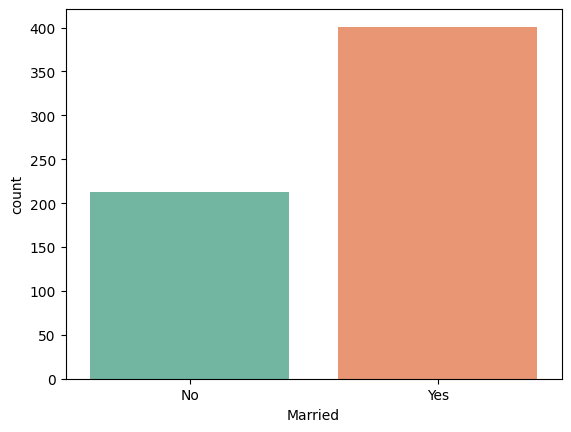

In [62]:
sns.countplot(x='Married', data=df, palette='Set2')

C:\Users\user\AppData\Local\Temp\ipykernel_18208\3716284324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Set2')


<Axes: xlabel='Education', ylabel='count'>

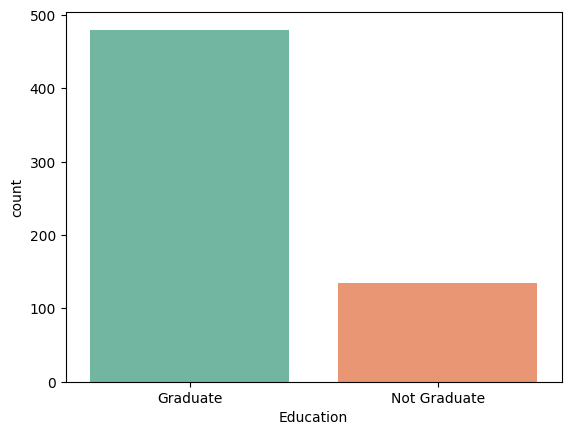

In [63]:
sns.countplot(x='Education', data=df, palette='Set2')

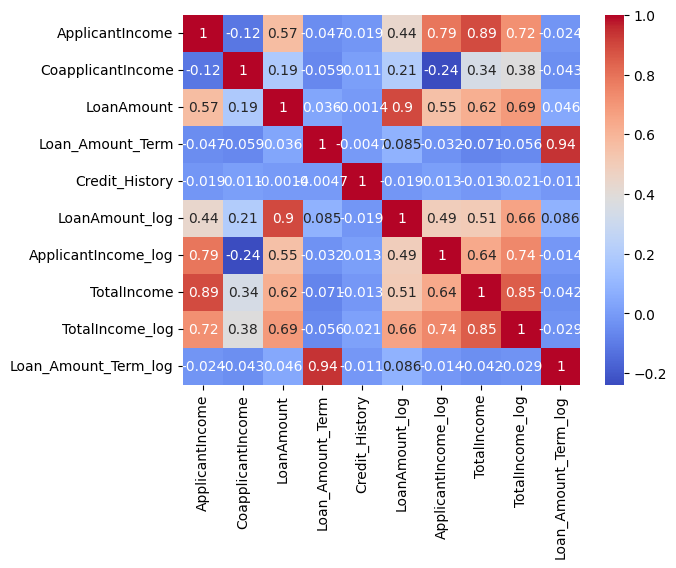

In [64]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log', 'TotalIncome',
       'TotalIncome_log', 'Loan_Amount_Term_log'],
      dtype='object')

In [66]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome,TotalIncome_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026,5849.0,8.674026,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.430109,6091.0,8.714568,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368,3000.0,8.006368,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,7.856707,4941.0,8.505323,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515,6000.0,8.699515,5.886104


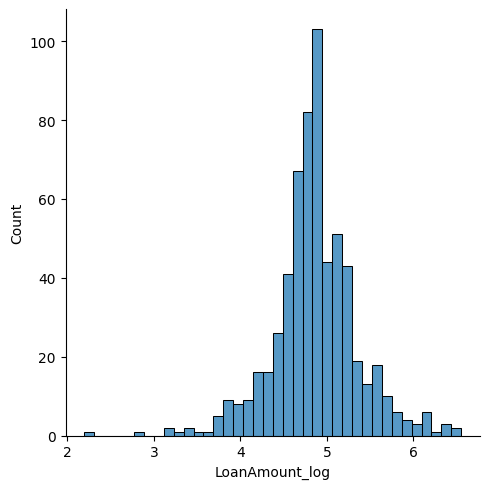

In [67]:
sns.displot(df['LoanAmount_log'])

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome,TotalIncome_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026,5849.0,8.674026,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.430109,6091.0,8.714568,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368,3000.0,8.006368,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,7.856707,4941.0,8.505323,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515,6000.0,8.699515,5.886104


In [23]:
#dropping unnecessary columns 
cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome','Loan_ID']
df=df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.857444,8.674026,8.674026,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.430109,8.714568,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,8.006368,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,7.856707,8.505323,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,8.699515,5.886104


In [ ]:
df=df.drop(columns='CoapplicantIncome_log', axis=1)
df.head()

In [69]:
#convert categorical data into numerical data 
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome,TotalIncome_log,Loan_Amount_Term_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y,4.857444,8.674026,5849.0,8.674026,5.886104
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N,4.852030,8.430109,6091.0,8.714568,5.886104
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,4.189655,8.006368,3000.0,8.006368,5.886104
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y,4.787492,7.856707,4941.0,8.505323,5.886104
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y,4.948760,8.699515,6000.0,8.699515,5.886104


In [71]:
#split independent and dependent feature
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [72]:
#Splitting the data into training and test split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25,random_state=42)  
print(X.shape, X_train.shape, X_test.shape)

(614, 17) (460, 17) (154, 17)


In [74]:
# Print column names to verify if 'Dependents' is present and correctly spelled
df.columns
df.columns = df.columns.str.strip()
print(df.columns)

if 'Dependents' in df.columns:
     df['Dependents'] = df['Dependents'].replace('3+', '3')
     print(df.head())
else:
    print("The column 'Dependents' does not exist in the DataFrame.")

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log', 'TotalIncome',
       'TotalIncome_log', 'Loan_Amount_Term_log'],
      dtype='object')
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3

In [75]:
#logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

ValueError: could not convert string to float: 'LP001319'

In [30]:
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.857444,8.674026,8.674026,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.430109,8.714568,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,8.006368,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,7.856707,8.505323,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,8.699515,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,4.262680,7.972466,7.972466,5.886104
610,Male,Yes,3,Graduate,No,1.0,Rural,Y,3.688879,8.320205,8.320205,5.192957
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,5.533389,8.996157,9.025456,5.886104
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,5.231109,8.933664,8.933664,5.886104
